# Monte-Carlo

Projet de Physique Statistique de Ismaël Lahmaid et Eliott Ducarme

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML
from numba import jit

## Exercice 1:

Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.

Commençons à tester 3 façon différentes de générer une gaussienne. Les deux premières sont des commandes plus directe pour générer une gaussienne (avec plus ou moins de souplesse) tandis que la dernière est une approximation plus importante car n'est théoriquement valide que lorsque le théorème de Moivre-Laplace le permet.

#### 1) numpy.random.standard_normal
Notre première commande nous permet de générer une loi normale standard ($\mu=0$ et $\sigma=1$). C'est la commande fitant le mieux avec une gaussienne, cependant elle est très spécifique et peut être très vite superflu si nous avons besoin de manipuler des distributions de forme différente

(-5.0, 5.0)

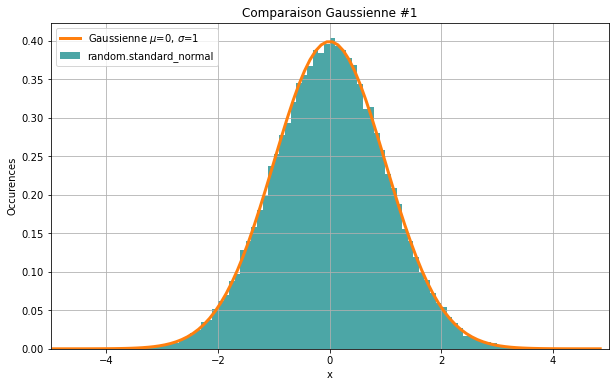

In [2]:
#------------------------------------ Préparation des histogrammes
binwidth=0.1 #Défini la largeur des colonnes
bins=np.arange(-5.,5., binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins
Standgau=np.random.standard_normal(100000) #Par défaut moyenne=0 et sigma=1

#------------------------------------ Graphe
plt.figure(figsize=(10,6))
plt.title('Comparaison Gaussienne #1')
plt.xlabel('x')
plt.ylabel('Occurences')

plt.hist(Standgau,bins=np.arange(-5.,5., binwidth),density=True, color="teal", alpha=0.7, label='random.standard_normal')
plt.plot(xc,np.exp(-0.5*(xc)**2)/(np.sqrt(2*np.pi)),label='Gaussienne $\\mu$=0, $\\sigma$=1',
            color='C1', linestyle='-',lw=3)

plt.legend(loc='upper left')
plt.grid()
plt.xlim(-5.,5.)

#### 2) numpy.random.normal
Cette commande permet de générer des gaussiennes de manière général. Il suffit de fournir une moyenne et un écart-type. Celui-ci est moins précis que numpy.random.standard_normal mais offre plus de souplesse n'étant pas limité à la normale standard.

(-5, 5)

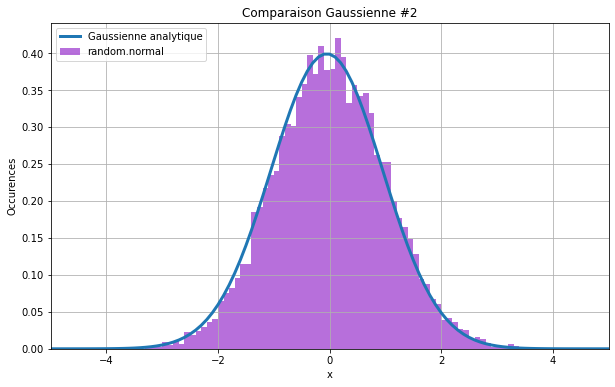

In [3]:
#------------------------------------ Préparation des histogrammes
nx=101
xi=np.linspace(-5.,5.,nx)

binwidth=0.1 #Défini la largeur des colonnes
bins=np.arange(-5.,5.2, binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins

#------------------------------------ Gaussienne
mu, sigma = 0, 1
normal = np.random.normal(mu, sigma, size=10000)
defin= np.exp(-0.5*((xc - mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)

#------------------------------------ Graphe
plt.figure(figsize=(10,6))
plt.title('Comparaison Gaussienne #2')
plt.xlabel('x')
plt.ylabel('Occurences')

plt.plot(xi, defin, label='Gaussienne analytique',
            color='C0', linestyle='-',lw=3)
plt.hist(normal, bins=bins, density=True, color="darkorchid", alpha=0.7, label='random.normal')

plt.legend(loc='upper left')
plt.grid()
plt.xlim(-5,5)

#### 3) numpy.random.binomial
Notre dernière routine est un générateur de distribution binomiale. Celle-ci peut également servir indirectement dans le cas spécifique où les hypothèses du théorème de Moivre-Laplace sont respectés ($\to np(1-p) \geq 10$) ainsi que les conditions du théorème central limite dont est dérivé le théorème de Moivre-Laplace, c'est-à-dire que les variables aléatoires sont indépendants et identiquement distribués.

Nous allons utiliser cette routine et la comparer avec la "numpy.random.normal" pour montrer la convergence de notre distribution binomiale. Nous superposerons nos 2 histogrammes (les parties communes sont par la combinaison des couleurs de nos histogrammes)

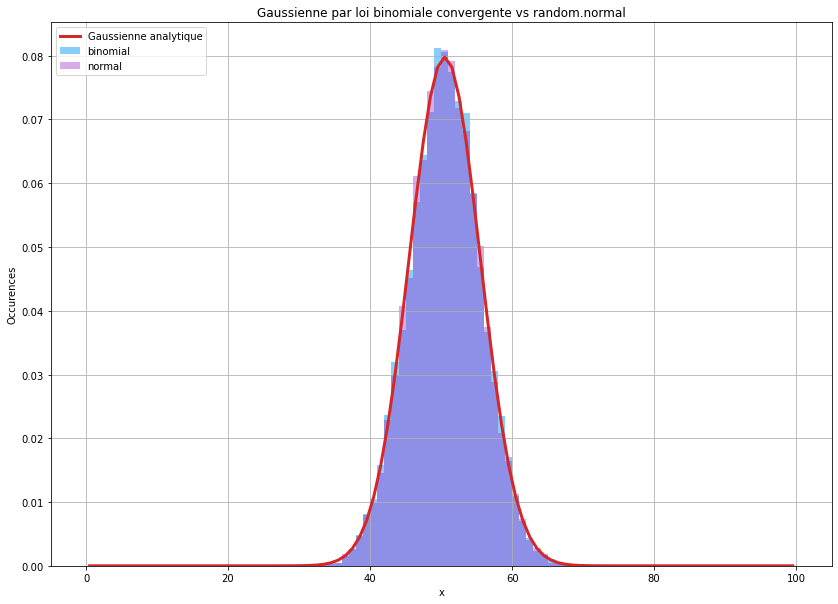

In [4]:
#------------------------------------ Paramètres
nx=101
xi=np.linspace(0.,100.,nx)
binwidth=1 #Défini la largeur des colonnes
bins=np.arange(0.,101., binwidth)
xc=(bins[:-1])+binwidth/2

#------------------------------------ Préparations des Gaussiennes
mu, sigma = 50.5, 5 #correspond à mu=n*p et sigma = p* sqrt(n) /!\ Nous avons décalé les colonnes
mooc = np.exp(-0.5*((xc - mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
binom = np.random.binomial(n=100, p=0.5, size=10000)
gauss = np.random.normal(mu, sigma, size=10000)

#------------------------------------ Graphe
plt.figure(figsize=(14,10))
plt.title('Gaussienne par loi binomiale convergente vs random.normal')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.plot(xc, mooc, label='Gaussienne analytique',
            color='C3', linestyle='-',lw=3)
plt.hist(binom, bins=bins, density=True, color="lightskyblue",label='binomial')
plt.hist(gauss, bins=bins, density=True, color="darkorchid", alpha=0.4, label='normal');
plt.legend(loc='upper left')
plt.grid()

Testons maintenant, deux générateurs d'exponentiels: le random.standard.exponential et le random.exponential. 
Comme précédemment, la première est une version "standardisée" tandis que la seconde nous laisse un peu plus de souplesse.

(0.0, 5.0)

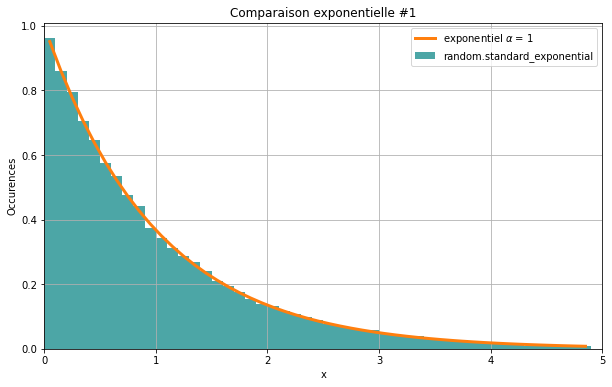

In [5]:
#------------------------------------------- Histogramme
binwidth=0.1 #Défini la largeur des colonnes
bins=np.arange(0.,5., binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins

#------------------------------------------- Exponentiel
Standexp=np.random.standard_exponential(100000) #Par défaut alpha=1

#------------------------------------------- Graphe
plt.figure(figsize=(10,6))
plt.title('Comparaison exponentielle #1')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(Standexp,bins=np.arange(0.,5., binwidth),density=True, color="teal", alpha=0.7, label='random.standard_exponential')
plt.plot(xc,1*np.exp(-1*xc),label='exponentiel $\\alpha$ = 1',
            color='C1', linestyle='-',lw=3)
plt.legend(loc='upper right')
plt.grid()
plt.xlim(0.,5.)

La prochaine commande est plus souple et nous permet de définir notre paramètre alpha comme bon nous semble.
Notons que la définition est légèrement différente de celle utilisé lors du mooc, nous allons devoir réadapter
la formule analytique par:
    
$$
p(x,\beta)=\frac{1}{\beta}\cdot\exp(-\frac{x}{\beta})
$$

(0.0, 20.0)

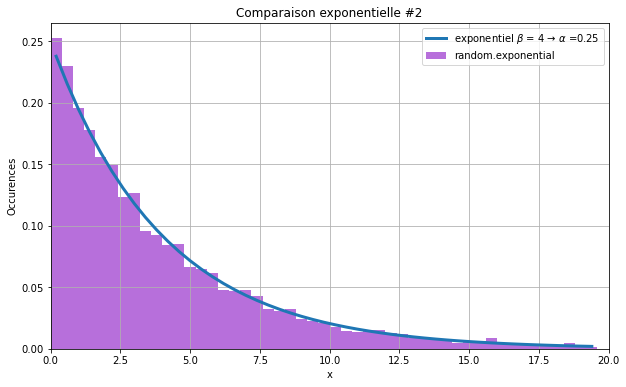

In [6]:
#------------------------------------------- Graphe
binwidth=0.4 #Défini la largeur des colonnes
bins=np.arange(0.,20., binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins

#------------------------------------------- Exponentiel
beta=4
exp=np.random.exponential(beta,10000)

#------------------------------------------- Graphe
plt.figure(figsize=(10,6))
plt.title('Comparaison exponentielle #2')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(exp,bins=np.arange(0.,20., binwidth),density=True, color="darkorchid", alpha=0.7, label='random.exponential')
plt.plot(xc,np.exp(-xc/beta)/beta,label='exponentiel $\\beta$ = 4 $\\to$ $\\alpha$ =0.25',
            color='C0', linestyle='-',lw=3)
plt.legend(loc='upper right')
plt.grid()
plt.xlim(0.,20.)

## Exercice 2:
Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.

Encodons la méthode de Box-Muller, cette méthode permet de générer une loi normale standard à partir d'une distribution uniforme.

(-5.0, 5.0)

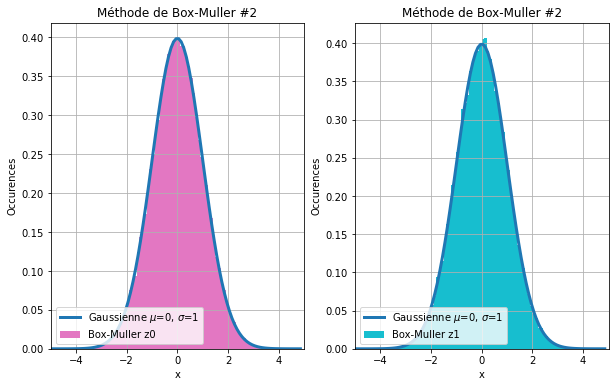

In [7]:
#--------------------------------------------- Histogrammes
binwidth=0.1
bins=np.arange(-5,5, binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins

#--------------------------------------------- Box-Muller définitions
N = 100000

u1 = np.random.random_sample(N) #Distribution uniforme 1
u2 = np.random.random_sample(N) #Distribution uniforme 2

z0 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2) #Loi normale standard 1
z1 = np.sqrt(-2*np.log(u2))*np.sin(2*np.pi*u1) #Loi normale standard 2


#--------------------------------------------- Graphe Box-Muller z0
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Méthode de Box-Muller #2')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(z0,bins,density=True, label='Box-Muller z0',
            color='C6', linestyle='-',lw=3)# Plots de z0
plt.plot(xc,np.exp(-0.5*(xc)**2)/np.sqrt(2*np.pi),label='Gaussienne $\\mu$=0, $\\sigma$=1',
            color='C0', linestyle='-',lw=3)
plt.legend(loc='lower left')
plt.grid()
plt.xlim(-5.,5.)

#--------------------------------------------- Graphe Box-Muller z1
plt.subplot(122)
plt.title('Méthode de Box-Muller #2')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(z1,bins,density=True, label='Box-Muller z1',
            color='C9', linestyle='-',lw=3)# Plots de z1
plt.plot(xc,np.exp(-0.5*(xc)**2)/np.sqrt(2*np.pi),label='Gaussienne $\\mu$=0, $\\sigma$=1',
            color='C0', linestyle='-',lw=3)
plt.legend(loc='lower left')
plt.grid()
plt.xlim(-5.,5.)

## Exercice 3
Add as systematic contribution to the displacement $dx$,

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

Remarquons tout d'abord que que la contribution cdt est indépendant de second terme du membre de droit de notre équation. Ainsi, cdt ne fait que simplement translater notre gaussienne de manière constante à chaque élément dt.

Notre moyenne aura donc évolué, à un l'instant t donné, de $$\mu_t = \mu + ct$$

Notre $\sigma$, quant à lui, reste inchangé et est donc identique à sa forme sans terme de translation.
$$\to \sigma_t = \sigma^2 + 2\alpha t$$

Ainsi, notre densité correspond à 

$$
\rho(x,t)=\frac{1}{\sigma_t\sqrt{2\pi}}\cdot \exp{-\frac{(x-\mu)^2}{2\sigma^2}} \quad (1)
$$

Posons à présent 
$$y=x-ct$$

$$ \Rightarrow dy=\sqrt{2\alpha dt}\cal{N(0,1)}$$


L'équation d'évolution de la densité est donc le même que pour le processus sans terme de translation
\begin{align}
\frac{\partial \rho}{\partial t}& =\alpha \frac{\partial^2 \rho}{\partial y^2}\\
 & =\alpha \left(\frac{\partial}{\partial x}-\frac{1}{c}\frac{\partial}{\partial t}\right)^2 \cdot\rho
\end{align}


La marche aléatoire évolue donc ainsi:

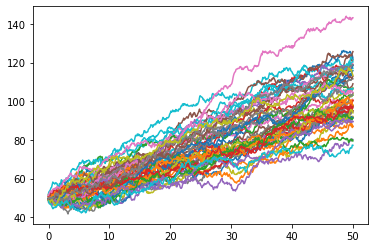

In [8]:
#--------------------------------------------- Paramètres
T, nt = 50.0, 500
dt=T/nt
alpha, c = 2, 1
t, x = np.arange(0,T+dt,dt), np.empty([nt+1,100000])

#--------------------------------------------- Loi normale
sigma, mu = 1.0, 50.0
x0=np.random.normal(mu,sigma,100000)
x[0]=x0

#--------------------------------------------- Marche aléatoire
for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,100000)+c*dt

for i in range(50):
    plt.plot(t,x[:,i])

Remarquons que le terme de translation fait "dériver" notre marche aléatoire vers les x positif. La constante c nous permet donc de modifier le sens de la marche (en fonction de son signe) et son intensité si nous prenons $c \neq 1$. Bien évidemment c=0, nous redonne une marche aléatoire comme vu durant le mooc.

Enfin, remarquons que notre solution est, à nouveau, assimilable à une gaussienne. Plotons en histogramme les positions obtenues lors de la dernière phase de la simulation et comparons là avec la gaussienne prédit en $(1)$

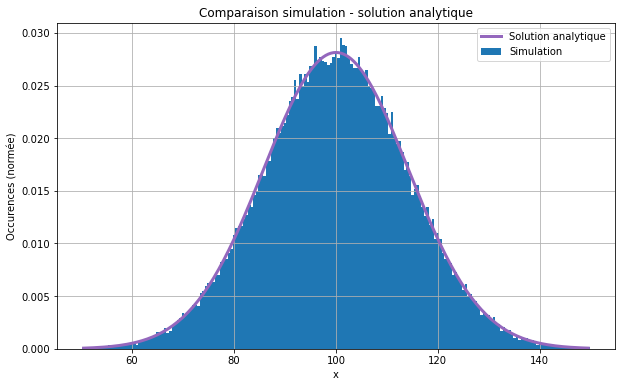

In [9]:
#---------------------------------- Définition moyenne et écart-type
mut=mu+c*T
sigmat=2*alpha*T+sigma**2

#---------------------------------- Générons les colonnes de l'histogramme
binwidth=0.5
bins=np.arange(-50+mut,50+mut,binwidth)
bins = bins + binwidth/2
bin_centers = bins[:-1]+binwidth/2

#---------------------------------- Plot
plt.figure(figsize=(10,6))
plt.title('Comparaison simulation - solution analytique')
plt.xlabel('x')
plt.ylabel('Occurences (normée)')

plt.hist(x[nt],bins,density=True,label='Simulation')
plt.plot(bin_centers, np.exp(-(bin_centers-mut)**2/(2.0*sigmat))/np.sqrt(2*np.pi*sigmat),label='Solution analytique',
            color='C4', linestyle='-',lw=3)

plt.legend(loc='upper right')
plt.grid()

## Exercice 4
Simulate the following random walk with a 'friction' term:

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!

In [10]:
#--------------------------------------------- Paramètres
T, nt = 50.0, 500
dt=T/nt
alpha, c = 0.2, 1
gamma = [0, 0.3, 0.9, 1.5]
t, x_0, x_1, x_2, x_3= np.arange(0,T+dt,dt), np.empty(nt+1), np.empty(nt+1), np.empty(nt+1), np.empty(nt +1)


#--------------------------------------------- Loi normale
sigma, mu = 1.0, 50.0
x_0[0]=0
x_1[0]=0
x_2[0]=0
x_3[0]=0

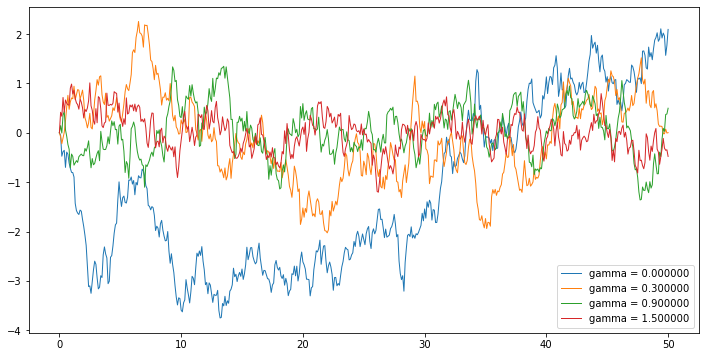

In [11]:
#--------------------------------------------- Marche aléatoire
for i in range(nt):
    x_0[i+1] = x_0[i] - gamma[0]*x_0[i]*dt + np.sqrt(2*alpha*dt)*np.random.normal(0,1)
    x_1[i+1] = x_1[i] - gamma[1]*x_1[i]*dt + np.sqrt(2*alpha*dt)*np.random.normal(0,1)
    x_2[i+1] = x_2[i] - gamma[2]*x_2[i]*dt + np.sqrt(2*alpha*dt)*np.random.normal(0,1)
    x_3[i+1] = x_3[i] - gamma[3]*x_3[i]*dt + np.sqrt(2*alpha*dt)*np.random.normal(0,1)

fig = plt.figure(figsize=(12,6))
plt.plot(t,x_0[:], lw=1, label='gamma = %f' % gamma[0])
plt.plot(t,x_1[:], lw=1, label='gamma = %f' % gamma[1])
plt.plot(t,x_2[:], lw=1, label='gamma = %f' % gamma[2])
plt.plot(t,x_3[:], lw=1, label='gamma = %f' % gamma[3])
plt.legend()

On peut déjà se douter que plus gamma est grand plus la trajectoire sera localisée autour de 0. Ce qui est normal vu qu'un terme de friction grand empêcheraient la trajectoire de s'éloigner trop fort de la position d'équilibre. Maintenant, on va un peux étoffer cette intuition en regardant un nombre d'itération.

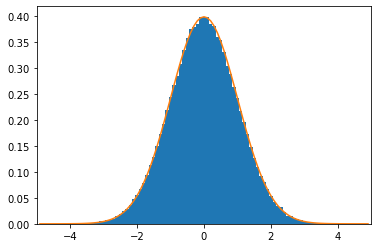

In [12]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
x0 = np.random.normal(loc=0,scale=sigma,size=npart)

# Generate bins centered around 0
binwidth=0.1
bins=np.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
plt.xlim(-5,5)
plt.hist(x0,bins,density=True);
plt.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigma**2))/np.sqrt(2*np.pi*sigma**2))

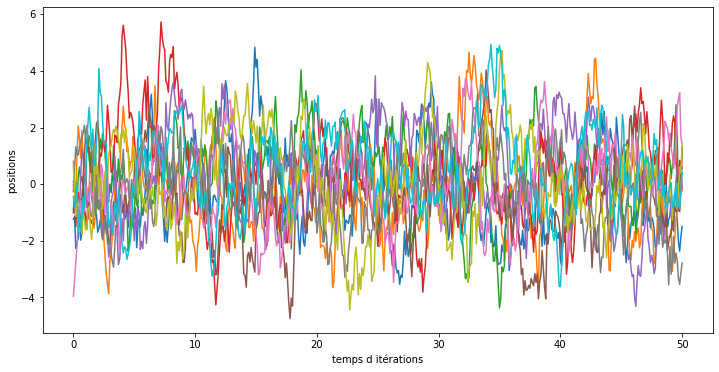

In [13]:
T=50.0
nt=500
dt=T/nt
alpha=2

t = np.arange(0,T+dt,dt)
x_0 = np.zeros([nt+1,npart])
x_1 = np.zeros([nt+1,npart])
x_2 = np.zeros([nt+1,npart])
x_3 = np.zeros([nt+1,npart])

x_0[0]=x0
x_1[0]=x0
x_2[0]=x0
x_3[0]=x0

for i in range(nt):
    x_0[i+1] = x_0[i] - gamma[0]*x_0[i]*dt + np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)
    x_1[i+1] = x_1[i] - gamma[1]*x_1[i]*dt + np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)
    x_2[i+1] = x_2[i] - gamma[2]*x_2[i]*dt + np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)
    x_3[i+1] = x_3[i] - gamma[3]*x_3[i]*dt + np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)

fig = plt.figure(figsize=(12,6))
plt.xlabel('temps d itérations')
plt.ylabel('positions')
for i in range(10):
    plt.plot(t,x_2[:,i])


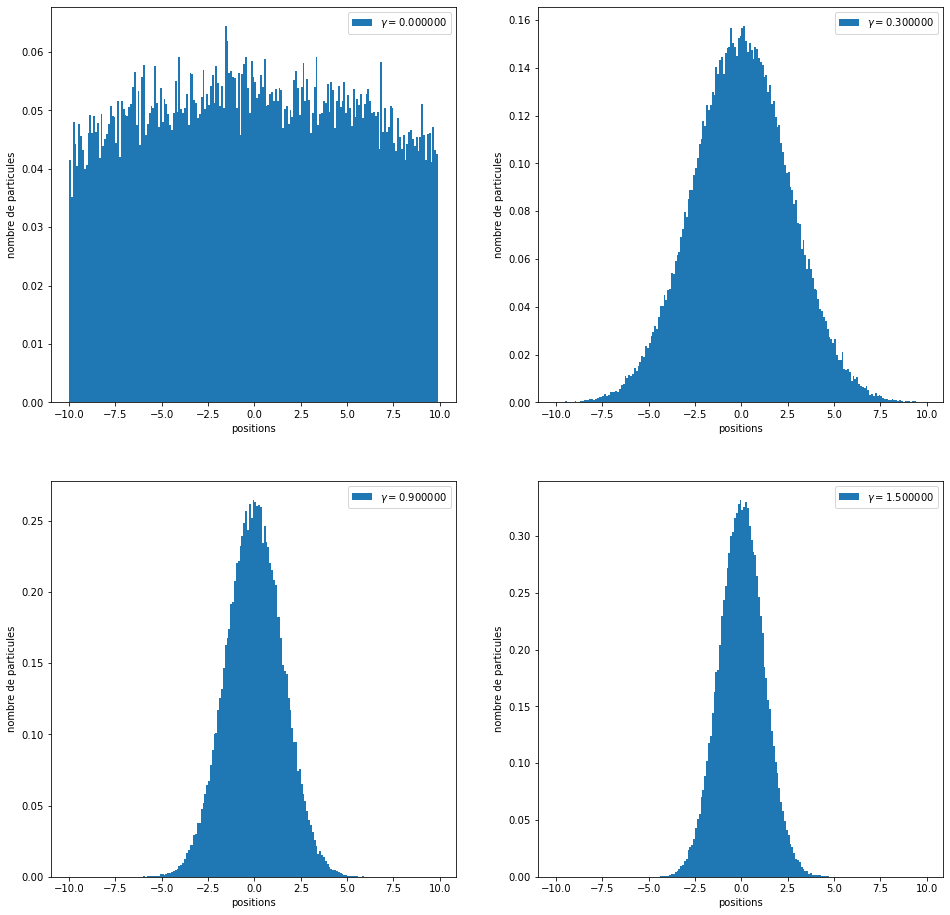

In [14]:
binwidth=0.1

bins_1=np.arange(-10,10,binwidth)
bins_2=np.arange(-10,10,binwidth)

fig = plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.hist(x_0[nt],bins_1,density=True,label='$\gamma=%f$' % gamma[0]);
plt.xlabel('positions')
plt.ylabel('nombre de particules')
plt.legend()
plt.subplot(2,2,2)
plt.hist(x_1[nt],bins_2,density=True,label='$\gamma=%f$' % gamma[1]);
plt.xlabel('positions')
plt.ylabel('nombre de particules')
plt.legend()
plt.subplot(2,2,3)
plt.hist(x_2[nt],bins_2,density=True,label='$\gamma=%f$' % gamma[2]);
plt.xlabel('positions')
plt.ylabel('nombre de particules')
plt.legend()
plt.subplot(2,2,4)
plt.hist(x_3[nt],bins_2,density=True,label='$\gamma=%f$' % gamma[3]);
plt.xlabel('positions')
plt.ylabel('nombre de particules')
plt.legend()

L'intuition de la section précédente s'est donc confirmé. On voit bien qu'avec $\gamma$ croissant, la distribution des positions s'affinnent autour de la position d'équilibre 0. D'ailleurs pour un $\gamma = 0$, on a carrément une gaussienne extrêmement plate ! L'importance de la friction pour la convergence à la position d'équilibre est donc très importante. 

## Exercice 5
Check that this (the fact that the Metropolis algortithm generated the right proportion of states) is not a coincidence and that the metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations. You may use the following routine to generate different ones with random initial dipole orientations.

Nous commençons par initier un état aléatoire de dimension nx,ny. 
Les deux fonctions lui suivant permette respectivement de 

1) Déterminer l'énergie à une position donnée de notre cellule (par exemple en (x,y)=(5,5))

2) Lancer l'algorithme de Metropolis afin de faire évoluer notre état initial.



In [15]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = np.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [16]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [17]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (np.random.random_sample()<np.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

Voici un exemple de cellule initiale ainsi que d'utilisation d'energy_at_site et de metropolis_at_site. Le résultat pour celui-ci est bien évidemment aléatoire. Il est possible que la couleur à une position donnée soit modifiée mais en une étape, ce changement n'est pas garanti. Nous verrons dans l'exercice 6 une animation montrant plusieurs actualisation d'un état initial pour chaque spin de la cellule et ce en fonction du paramètre alpha.

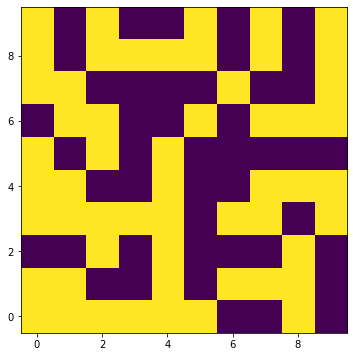

In [18]:
#--------------------------- paramètres
nx=10
ny=10
r = initial_state(nx,ny)
alpha=0.1

#--------------------------- graphe
plt.figure(figsize=(6,6))
plt.imshow(r,interpolation="none",origin='lower')

L'énergie à la position (5,5) est: 0.0
Après l'application d'une étape de l'algorithme de Metropolis, la cellule devient:


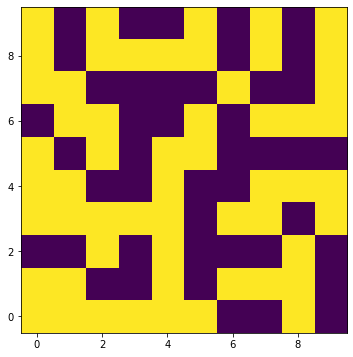

In [19]:
#------------------------------------------ Energie à la position (5,5)
print("L'énergie à la position (5,5) est:",energy_at_site(r,alpha,r[5,5],5,5))
metropolis_at_site(r,alpha,5,5)

#------------------------------------------ Flip d'un spin à la position (5,5)?
print("Après l'application d'une étape de l'algorithme de Metropolis, la cellule devient:")
plt.figure(figsize=(6,6))
plt.imshow(r,interpolation="none",origin='lower')

Nous allons maintenant créer une routine permettant de générer n fois la procédure précédente (c'est-à-dire en une position donnée de l'état) et allons print le ratio des probabilités ups et de probabilités downs pour chaque itération.

Il nous suffit d'appliquer plusieurs fois l'algorithme de Metropolis et stocker chaque valeurs obtenues. Le calcul du ratios sera obtenus en extrayant les valeurs de ups et de downs. 

In [20]:
def check_ratio(n,NMC):
    #----------------------------------------------------------- Nous initions les paramètres utiles au bon fonctionnement des sous-routines.
    nx, ny = 10, 10
    alpha = 0.1
    
    #----------------------------------------------------------- Nous préparons les variables contenant nos réponses finales
    theo, ratios = np.empty(n), np.empty(n)
    
    #----------------------------------------------------------- Routine pour checker le ratio
    for i in range(n):          #Nous allons resortir à la fin, n valeur de ratio
        sp=initial_state(nx,ny) #Nous commençons par générer un état initial
        
        energy1 = energy_at_site(sp,alpha,-1,5,5)
        energy2 = energy_at_site(sp,alpha, 1,5,5) #Nous inversons le sigma

        states = np.empty(NMC) #Nous créons une matrice vide contenant la valeur des spins de notre cellule.
        states[0]=sp[5,5]      #Initialement, states prend la valeur de notre état initiale à la position (5,5)

        for m in range(0,NMC): #Nous générons m fois l'algorithme de Metropolis
            
            metropolis_at_site(sp,alpha,5,5)
            states[m]=sp[5,5]

        ups = np.extract(states==1, states).size #De manière arbitraire, nous extrayons tous les ups
        downs = NMC - ups                        #Et le reste correspond aux downs
        theo[i] = np.exp(energy1-energy2)        #On applique la définition théorique
        ratios[i] = ups/downs                    #Et checkons enfin le ration ups/downs
    return [theo,ratios]

In [21]:
[theo,ratios]= check_ratio(10,100000)
print("Les valeurs théoriques attendues sont:\n", theo)
print("\n Les ratios obtenus quant à eux sont:\n", ratios)

Les valeurs théoriques attendues sont:
 [1.         1.4918247  1.4918247  1.         1.         1.4918247
 1.         1.         2.22554093 1.        ]

 Les ratios obtenus quant à eux sont:
 [1.         1.49451207 1.49650489 1.         1.         1.49128052
 1.         1.         2.21140692 1.        ]


## Question 6
Perform a series of runs with $\alpha \in [0,1]$ and plot the average energy of the system and its magnetisation as a function of 𝛼. Estimate the critical value of 𝛼 at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?

Nous allons estimer la valeur de $\alpha_{crit}$ à la transition de phase. Pour cela, nous utliserons les graphes de l'énergie et de la magnétisation en fonction d'alpha. 

Commençons par utiliser la routine ising_model_metropolis qui nous renvoie une séquence d'états du système pour le modèle d'Ising en utilisant l'agorithme de Metropolis.

In [22]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = np.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

Nous allons maintenant utiliser cette routine pour différent $\alpha$ sur l'intervalle [0,1] par pas de 0.1. Nous partirons d'un état initial où chaque spin est orienté dans la même direction (up).

Nous en profitons pour illustrer, avec une animation, l'évolution du système pour chaque $\alpha$ donné (cela nous permet également de voir l'effet de metropolis_at_site comme annoncé dans l'exercice précédent).

In [23]:
#------------------------ Paramètres
nx, ny = 100, 100
NMC = 100
alphas=np.linspace(0,1,11)

#------------------------ Plot des états pour chaque alphas
fig = plt.figure(figsize=(6,3))

    
sp = np.ones([nx,ny])
states_0 = ising_model_metropolis(sp, NMC, nx, ny, alphas[0])
plt.subplot(3, 4, 1)
img0 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny]) #Nous réinitialisons sp à chaque alpha afin de repartir de la même condition initiale
states_1 = ising_model_metropolis(sp, NMC, nx, ny, alphas[1])
plt.subplot(3, 4, 2)
img1 = plt.imshow(states_1[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_2 = ising_model_metropolis(sp, NMC, nx, ny, alphas[2])
plt.subplot(3, 4, 3)
img2 = plt.imshow(states_2[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_3 = ising_model_metropolis(sp, NMC, nx, ny, alphas[3])
plt.subplot(3, 4, 4)
img3 = plt.imshow(states_3[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_4 = ising_model_metropolis(sp, NMC, nx, ny, alphas[4])
plt.subplot(3, 4, 5)
img4 = plt.imshow(states_4[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_5 = ising_model_metropolis(sp, NMC, nx, ny, alphas[5])
plt.subplot(3, 4, 6)
img5 = plt.imshow(states_5[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_6 = ising_model_metropolis(sp, NMC, nx, ny, alphas[6])
plt.subplot(3, 4, 7)
img6 = plt.imshow(states_6[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_7 = ising_model_metropolis(sp, NMC, nx, ny, alphas[7])
plt.subplot(3, 4, 8)
img7 = plt.imshow(states_7[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_8 = ising_model_metropolis(sp, NMC, nx, ny, alphas[8])
plt.subplot(3, 4, 9)
img8 = plt.imshow(states_8[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_9 = ising_model_metropolis(sp, NMC, nx, ny, alphas[9])
plt.subplot(3, 4, 10)
img9 = plt.imshow(states_9[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

sp = np.ones([nx,ny])
states_10 = ising_model_metropolis(sp, NMC, nx, ny, alphas[10])
plt.subplot(3, 4, 11)
img10 = plt.imshow(states_10[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

#------------------------ Animations
def animate(j):
    img0.set_array(states_0[j])
    img1.set_array(states_1[j])
    img2.set_array(states_2[j])
    img3.set_array(states_3[j])
    img4.set_array(states_4[j])
    img5.set_array(states_5[j])
    img6.set_array(states_6[j])
    img7.set_array(states_7[j])
    img8.set_array(states_8[j])
    img9.set_array(states_9[j])
    img10.set_array(states_10[j])

    
anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.close()
HTML(anim.to_html5_video())

Remarquons que plus $\alpha$ augmente, moins les spins up sont alternés. Ce qui est sensé car 

\begin{align}
\alpha = \frac{J}{K_B T}
\end{align}

Ce qui signifie que plus $\alpha$ augmente, plus la température diminue et donc plus l'énergie est basse. Les fluctuations thermiques sont donc réduits et les spins s'inversent moins régulièrement.

Calculons maintenant l'énergie et la magnétisation moyenne d'un système en faisant varier $\alpha$. Nous commençons par créer des routines pour une configuration donné et allons ensuite répéter nos routines n fois(pour un même alpha).

Pour l'énergie, on définit donc tout d'abord "one_energy" qui prend un état donné ainsi qu'un alpha fixé et qui renvoit l'énergie d'une configuration. Et "average_energy" qui nous ressort l'énergie moyenne sur plusieurs configurations successives. L'énergie moyenne est défini par

\begin{align}
<E> & = \frac{\sum_k E_k}{N_k}
\end{align}
    
où la somme sur les $N_k$ représente la somme sur toutes les configurations utilisées pour calculer la moyenne. Il va de soit que la moyenne de la magnétisation suivra la même forme.

In [24]:
def one_energy(sp,alpha):
    #------------------------------ Paramètres
    nx=ny=len(sp[0]) #Servira à définir notre grille initiale de dimensions nx X ny
    E_tot= 0         #On initialise un compteur pour sommer l'énergie
    
    #------------------------------ On parcourt ici notre grille et additionnons l'énergie en chaque point
    for m in range(nx):
        for l in range(ny):
            sigma=sp[l,m]    #Nous donne le spin en la position l,m
            E_tot=energy_at_site(sp,alpha,sigma,m,l)+E_tot 
    return E_tot/2  #Nous divisions par deux car on somme sur les paires de spins



def average_energy(states,alpha,NMC):    
    e_moy_norm, e_moy_non_norm = np.empty(NMC+1), np.empty(NMC+1) #Nous définissons des matrices vides pour stocker les nouveaux états
    e_moy_norm[0], e_moy_non_norm[0] = one_energy(states[0],alpha), one_energy(states[0],alpha) #et remplaçons le premier élément par l'état initial

    #------------------------------------ Moyenne sur les NMC configurations
    for n in range(1,NMC+1):
        e_moy_non_norm[n] = (one_energy(states[n],alpha) + e_moy_non_norm[n-1])
    
    for m in range(1,NMC+1):
        e_moy_norm[m]=(e_moy_non_norm[m]/(m+1))
        
    return e_moy_norm #Energie moyenne de la succéssion de configurations pour un alpha donné.

Nous appliquons maintenant un raisonnement simulaire pour la magnétisation.

Nous créons dans un premier temps une routine permettant de calculer la magnétisation totale pour une configuration donnée de spins (toujours à alpha fixé) et une seconde pour la moyenne.

Notons que la magnétisation est défini comme la somme des n spins:
\begin{align}
M & = \sum_{i=1}^{n} \sigma_i
\end{align}

Ainsi que sa moyenne:
\begin{align}
<M> & = \frac{\sum_k M_k}{N_k}
\end{align}
où les $N_k$ représentent les k configurations utilisées pour calculer la moyenne.

In [25]:
def one_magn(sp):
    nx=ny=len(sp[0])
    magn_tot=0.     #On initiale notre compteur
    for m in range(nx):
        for l in range(ny):
            sigma=sp[l,m]
            magn_tot=sigma+magn_tot
    return magn_tot 

def average_magn(states,NMC): #le raisonnement est exactement le même que celui suivi pour average_energy
    magn_moy_norm, magn_moy_non_norm = np.zeros(NMC+1), np.zeros(NMC+1)
    magn_moy_norm[0], magn_moy_non_norm[0] = one_magn(states[0]), one_magn(states[0])
    
    for n in range(1,NMC+1):
        magn_moy_non_norm[n] = (one_magn(states[n]) + magn_moy_non_norm[n-1])

    for m in range(1,NMC+1):
        magn_moy_norm[m]= (magn_moy_non_norm[m])/(m+1)
        
    return magn_moy_norm

Mettons en graphe les valeurs de l'énergie ainsi que celles de la magnétisation. Nous rajoutons également sur celui-ci la valeur théorique de l'alpha critique de Onsager: $\alpha_{critique}=0.4406868$. Celle-ci nous servira d'indicateur théorique pour nos graphiques.

Nous avons calculé cette valeur à partir de la température critique (température de Curie, c'est-à-dire la température à partir de laquelle la magnétisation va s'annuler).

$$T_c=\frac{2J}{k_b ln(1+\sqrt{2})}$$

dès lors, $\alpha = \frac{J}{K_B T}$ implique que notre alpha critique devient 

\begin{align}
\alpha_{crit}&=\frac{ln(1+\sqrt{2})}{2}\\
                 &=0.44068679351
\end{align}

Représentons graphiquement tout d'abord l'énergie en fonction de alpha.

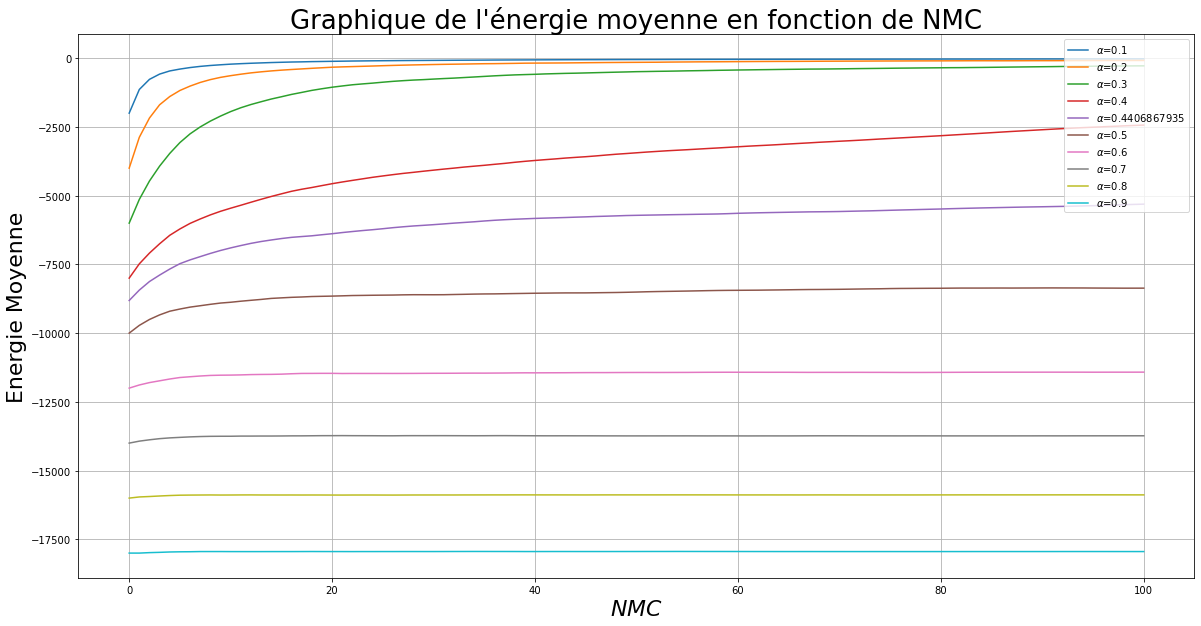

In [26]:
NMC_grid = np.arange(0,101,1)
plt.figure(figsize=(20,10))
plt.title("Graphique de l'énergie moyenne en fonction de NMC", size=26)
plt.xlabel('$NMC$', size=22)
plt.ylabel("Energie Moyenne", size=22)


#Nous récupérons les states_i et les alphas générés précédemment.

energy_1, magn_1 = average_energy(states_1,alphas[1],NMC),average_magn(states_1,NMC)
plt.plot(NMC_grid,energy_1,label='$\\alpha$=0.1')

energy_2, magn_2 = average_energy(states_2,alphas[2],NMC),average_magn(states_2,NMC)
plt.plot(NMC_grid,energy_2,label='$\\alpha$=0.2')

energy_3, magn_3 = average_energy(states_3,alphas[3],NMC),average_magn(states_3,NMC)
plt.plot(NMC_grid,energy_3,label='$\\alpha$=0.3')

energy_4, magn_4 = average_energy(states_4,alphas[4],NMC),average_magn(states_4,NMC)
plt.plot(NMC_grid,energy_4,label='$\\alpha$=0.4')

alpha = 0.44068679351   #alpha critique de Onsanger
sp=np.ones([nx,ny])
states_Onsanger=ising_model_metropolis(sp,NMC,nx,ny,alpha)
energy_Onsanger, magn_Onsanger = average_energy(states_Onsanger,alpha,NMC), average_magn(states_Onsanger,NMC)
plt.plot(NMC_grid,energy_Onsanger,label='$\\alpha$=0.4406867935')

energy_5, magn_5 = average_energy(states_5,alphas[5],NMC),average_magn(states_5,NMC)
plt.plot(NMC_grid,energy_5,label='$\\alpha$=0.5')

energy_6, magn_6 = average_energy(states_6,alphas[6],NMC),average_magn(states_6,NMC)
plt.plot(NMC_grid,energy_6,label='$\\alpha$=0.6')

energy_7, magn_7 = average_energy(states_7,alphas[7],NMC),average_magn(states_7,NMC)
plt.plot(NMC_grid,energy_7,label='$\\alpha$=0.7')

energy_8, magn_8 = average_energy(states_8,alphas[8],NMC),average_magn(states_8,NMC)
plt.plot(NMC_grid,energy_8,label='$\\alpha$=0.8')

energy_9, magn_9 = average_energy(states_9,alphas[9],NMC),average_magn(states_9,NMC)
plt.plot(NMC_grid,energy_9,label='$\\alpha$=0.9')


plt.grid()
plt.legend(loc='upper right')

Que voyons-nous sur ce graphe? Nous remarquons tout d'abord que lorsque alpha augmente (autrement dit que la température diminue), l'énergie thermique devient de plus en plus constant et ipso facto les fluctuations deviennent de plus en plus rares. Cependant, on remarque également que plus alpha est grand plus la transition est rapide.

Enfin, on remarque que pour la valeur théorique de Onsäger, la transition  est plus lente.

Nous utiliserons ce graphe pour trouver notre $\alpha_{crit}$, en effet, nous pouvons d'ores et déjà estimer le nombre d'itérations nécessaire pour que le système soit à l'équilibre. 

Regardons maintenant le graphique de la magnétisation, celui-ci nous servira à restreindre l'intervalle d'alphas pour déterminer notre valeur critique.

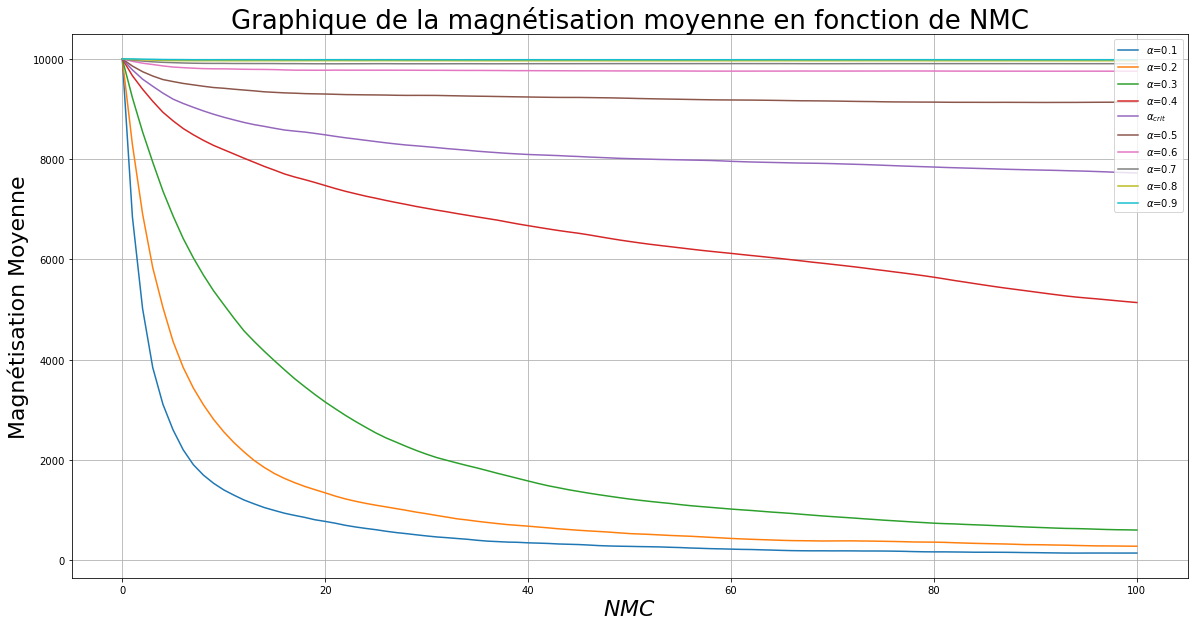

In [27]:
NMC_grid = np.arange(0,101,1)
plt.figure(figsize=(20,10))
plt.title("Graphique de la magnétisation moyenne en fonction de NMC", size=26)
plt.xlabel('$NMC$', size=22)
plt.ylabel("Magnétisation Moyenne", size=22)

#--------------------------------------------------- Graphes
plt.plot(NMC_grid, magn_1,label='$\\alpha$=0.1')
plt.plot(NMC_grid, magn_2,label='$\\alpha$=0.2')
plt.plot(NMC_grid, magn_3,label='$\\alpha$=0.3')
plt.plot(NMC_grid, magn_4,label='$\\alpha$=0.4')
plt.plot(NMC_grid, magn_Onsanger,label='$\\alpha_{crit}$')
plt.plot(NMC_grid, magn_5,label='$\\alpha$=0.5')
plt.plot(NMC_grid, magn_6,label='$\\alpha$=0.6')
plt.plot(NMC_grid, magn_7,label='$\\alpha$=0.7')
plt.plot(NMC_grid, magn_8,label='$\\alpha$=0.8')
plt.plot(NMC_grid, magn_9,label='$\\alpha$=0.9')


plt.grid()
plt.legend(loc='upper right')

Remarquons que la magnétisation initiale est la même pour tous nos $\alpha$, ce qui est sensé au vue de la définition de  magnétisation que nous avons utilisé. On remarque que plus $\alpha$ est petit, plus le système subit des fluctuations thermiques et donc plus les spins s'inversent. Ce qui explique la diminution fulgurante de la magnétisation pour ces valeurs d'alpha. Il va de soit que pour une configuration initiale inversée (uniquement des spins downs au lieu de ups), la magnétisation aurait augmenté au lieu de diminué.

Analysons maintenant ce graphique. On peut remarquer graphiquement que, pour la plupart des $\alpha$, l'état d'équilibre est atteint après approximativement 35 itérations de l'ising_model_metropolis. Cependant, cela n'est pas nécessairement vrai pour l'intervalle $[0.3,0.6]$ (nous prenons un intervalle large pour éviter tout oublis de données).

Affinons maintenons notre analyse pour trouver notre alpha critique. Nous savons que pour l'intervalle $]0.3,0.6[$, l'équilibre est atteint après 35 itérations. Nous utiliserons donc l'état obtenu à la 35 itérations de l'algorithme de ising_model_metropolis comme état initial. Pour l'intervalle $[0.3,0.6]$, nous allons augmenter le nombre d'itérations car l'équilibre est atteint bien plus tard.

Adaptons nos routines average_energy et average_magn afin que ceux-ci ne démarre qu'à la $j^e$ itérations. Le j correspond à l'indice qui indique que le $(j-1)^e$ état de notre grille states est à l'équilibre.

In [28]:
def alphas_average_energy(states, alpha, NMC, j):# Notons que cette routine est la même que son analogue précédent. 
                                                 #L'unique différence réside par la présence de la variable j qui nous
                                                #fait démarrer au (j-1)e état -> A l'équilibre
    e_moy_norm, e_moy_non_norm = np.empty(NMC-j+2), np.empty(NMC-j+2)
    e_moy_norm[0], e_moy_non_norm[0] = one_energy(states[j-1],alpha), one_energy(states[j-1],alpha)
    
    for n in range(1,NMC-j+2):
        e_moy_non_norm[n] = one_energy(states[n+j-1],alpha) + e_moy_non_norm[n-1]

    for m in range(1,NMC-j+2):
        e_moy_norm[m]=(e_moy_non_norm[m]/(m+1))
        
    return e_moy_norm

def alphas_average_magn(states,NMC,j): #idem pour cette routine, la différence avec la versions average_magn réside dans le j
    magn_moy_norm, magn_moy_non_norm = np.zeros(NMC-j+2), np.zeros(NMC-j+2)
    magn_moy_norm[0], magn_moy_non_norm[0] = one_magn(states[j-1]), one_magn(states[j-1])
    
    for n in range(1,NMC-j+2):
        magn_moy_non_norm[n] = one_magn(states[n+j-1]) + magn_moy_non_norm[n-1]
    
    m=1    
    for m in range(1,NMC-j+2):
        magn_moy_norm[m]= (magn_moy_non_norm[m])/(m+1)
        
    return magn_moy_norm


Nous créons maintenant deux petites routines nous permettant de calculer l'énergie et la magnétisation moyenne de notre système avec les restrictions sur les alphas énoncées précédemment. Ces routines n'ont besoin que de la taille de la grille ainsi qu'une séquence d'alphas donnée.

In [29]:
def energies_average(nx,ny,alphas):
    #-------------------------------- Paramètres
    energies_average=np.zeros(len(alphas)) #On initie une matrice composée de 0, on va remplacer petit à petit nos valeurs dans la boucle for. Nous ressortirons cette matrice comme résultat.
    alpha_ener_stock=np.zeros(len(alphas)) #Cette matrice sert d'intermédiaire à notre return energies average

    #-------------------------------- energies_average
    for i in range(0,len(alphas)):             #On parcourt toutes les valeurs de alpha de notre séquence
        if alphas[i] <0.6 and alphas[i] > 0.3: #On applique nos conditions pour l'intervalle [0.3,0.6]
            j=2000
            NMC=2500
        else:                                  #Ou alors on applique nos conditions pour le complémentaire de [0.3,0.6]
            j=36                               #N'oublions pas que j correspond à l'itération après avoir l'état d'équilibre
            NMC=500
        sp=np.ones((nx,ny))                                            #On initie une grille de spins up de taille nx X ny
        states=ising_model_metropolis(sp,NMC,nx,ny,alphas[i])          #On applique ising_model_metropolis comme précédemment
        alpha_ener_stock=alphas_average_energy(states,alphas[i],NMC,j) #On commence à calculer l'énergie moyenne au (j-1)e état.
        energies_average[i]=alpha_ener_stock[-1]                       #On ne garde que la dernière valeur obtenue
    return energies_average                                     #On retourne l'ensemble des énergies correspondant à chaque alpha

In [30]:
def magn_average(nx,ny,alphas): #Le principe est similaire à energies_average mais pour la magnétisation.
    #-------------------------------- Paramètres    
    magn_average=np.zeros(len(alphas))
    alpha_magn_stock=np.zeros(len(alphas))
    
    #-------------------------------- magn_average
    for i in range(0,len(alphas)):
        if alphas[i] <0.6 and alphas[i] > 0.3:
            j=2000
            NMC=2500
        else:
            j=36
            NMC=500
        sp=np.ones((nx,ny))
        states=ising_model_metropolis(sp,NMC,nx,ny,alphas[i])
        alpha_magn_stock=alphas_average_magn(states,NMC,j)
        magn_average[i]=alpha_magn_stock[-1]
    return magn_average

Nous préparons les paramètres nécessaire pour faire tourner ces deux dernières routines:

In [31]:
alphas=np.linspace(0,1,51)
print(alphas) #Nous en profitons pour voir les valeurs de alphas que nous allons analyser.
nx, ny = 50, 50

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


Lançons nos fonctions et plot-ons les sur un même graphe. Attention, la génération de nos valeurs peuvent prendre un certains temps (~3h pour un AMD FX8350 - 8Gb de RAM)

In [32]:
energies_average = energies_average(nx,ny,alphas)
magn_average = magn_average(nx,ny,alphas)

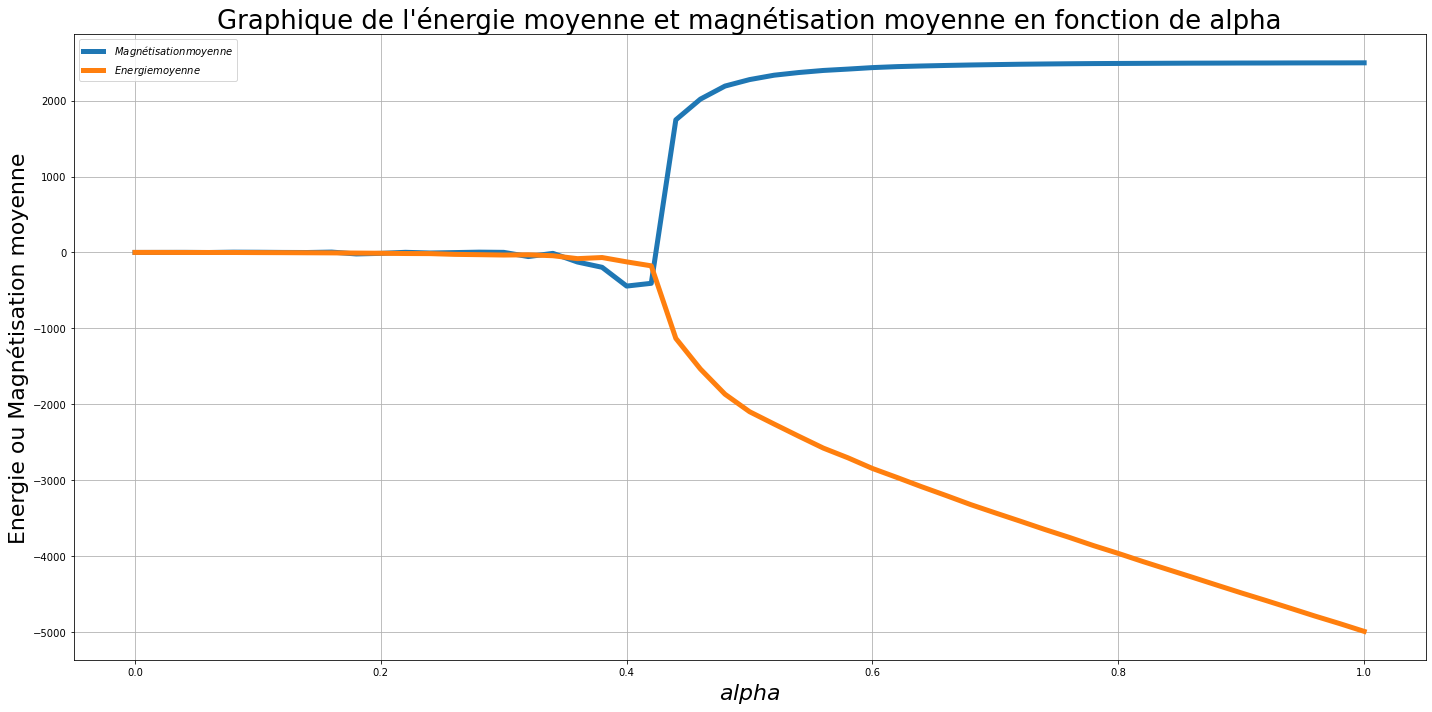

In [33]:
plt.figure(figsize=(20,10))

plt.title("Graphique de l'énergie moyenne et magnétisation moyenne en fonction de alpha", size=26)
plt.xlabel('$alpha$',size=22)
plt.ylabel("Energie ou Magnétisation moyenne",size=22)
plt.grid()

plt.plot(alphas,magn_average,"-",label='$\ Magnétisation moyenne$', lw=5)
plt.plot(alphas,energies_average,"-",label='$\ Energie moyenne$', lw=5)

plt.legend()
plt.tight_layout()

Nous pouvons voir sur ce graphe que l'énergie/magnétisation moyenne reste approximativement constante jusque $\alpha = 0.4$. Au-delà de cette valeur, nos quantités varie plus intensément jusqu'à la transition vers 0.44 où l'énergie et la magnétisation divergent soudainement. De plus, la diminution de l'énergie semble avoir un régime linéaire vers $\alpha=0.65$ et la magnétisation semble également atteindre un plateau aux environs de ce même $\alpha$

Le point de divergence semble approximativement coller à la valeur théorique.

## Question 7

On regarde un cas où les spins sont maintenus sur les bords du système. Il va falloir adapter notre ising model pour en tenir compte. Voyons cela. On commence par définir la fonction qui va mesurer l'énergie entre des spins en interaction avec leurs voisins.

In [3]:
@jit
def energy_at_site_boundary(s,alpha,sigma,ix,iy): 
    """
    Calcul de l'énergie pour la position (ix,iy)
    """
    nx = ny = len(s[0])
    s[0,:] = s[nx-1,:] = s[:,ny-1] = s[:,0] = 1 # on fixe le bord toujours égal à des sins ups.

    #on calcule l'énergie pour les coins
    if (ix == 0 and iy == 0):
        energy = -alpha*( s[(ix+1),iy] + s[ix,(iy+1)])
    elif (ix ==0 and iy == ny-1):
        energy = -alpha*( s[(ix+1),iy] + s[ix,(iy-1)] )
    elif (ix == nx-1 and  iy == 0):
        energy = -alpha*( s[(ix-1),iy] + s[ix,(iy+1)] )
    elif (ix == nx-1 and  iy == ny-1):
        energy = -alpha*( s[(ix-1),iy] + s[ix,(iy-1)] )
        
    #on calcule sur les bords     
    elif (ix==0):
         energy = -alpha*( s[(ix+1),iy] + s[ix,(iy-1)] + s[ix,(iy+1)])
    elif (iy==0):
         energy = -alpha*( s[(ix-1),iy] + s[(ix+1),iy] + s[ix,(iy+1)])
    elif (ix==nx-1):
         energy = -alpha*( s[(ix-1),iy] + s[ix,(iy-1)] + s[ix,(iy+1)])
    elif (iy==ny-1):
         energy = -alpha*( s[(ix-1),iy] + s[(ix+1),iy] + s[ix,(iy-1)])

    #sur le reste des points
    else:
        energy = -alpha*sigma*( s[(ix-1),iy] + s[(ix+1),iy] + s[ix,(iy-1)] + s[ix,(iy+1)])

    return energy

In [4]:
def metropolis_at_site_boundary(s,alpha,ix,iy):
    #compare la configuration la plus favorable
    sigma=s[ix,iy]
    e_0 = energy_at_site_boundary(s,alpha,sigma,ix,iy)
    sigma = -sigma
    e_1 = energy_at_site_boundary(s,alpha,sigma,ix,iy)
    
    # la configuration est changée avec une probabilité de metropolis
    if (np.random.random_sample()<np.exp(-(e_1-e_0))):
        if (ix!= 0 and (iy!= 0) and (ix!= nx-1) and (iy!= ny-1)): #on exclue les spins du bord
                        s[ix,iy]=-s[ix,iy]

In [5]:
def ising_model_metropolis_boundary(s, NMC, nx, ny, alpha):
    #implémente ising model 
    states = np.empty([NMC+1,nx,ny])
    states[0] = s.copy()
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)    
            metropolis_at_site_boundary(s,alpha,ix,iy) 
        states[i]=s.copy()   
    return states

Vérifions que nos défintitions fonctionnent sur quelques valeurs de $\alpha$

In [7]:
nx=40
ny=40

NMC=100
s = np.ones([nx,ny])
alpha=0.1
states1 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

alpha=0.2
states2 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

alpha=0.4
states3 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

alpha=0.5
states4 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

alpha=0.7
states5 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

alpha=1.0
states6 = ising_model_metropolis_boundary(s.copy(), NMC, nx, ny, alpha)

In [90]:
fig = plt.figure(figsize=(6,3))

plt.subplot(2, 3, 1)
img01 = plt.imshow(states1[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

plt.subplot(2, 3, 2)
img02 = plt.imshow(states2[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

plt.subplot(2, 3, 3)
img03 = plt.imshow(states3[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)
plt.subplot(2, 3, 4)
img04 = plt.imshow(states4[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

plt.subplot(2, 3, 5)
img05 = plt.imshow(states5[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

plt.subplot(2, 3, 6)
img06 = plt.imshow(states6[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img01.set_array(states1[i])
    img02.set_array(states2[i])
    img03.set_array(states3[i])
    img04.set_array(states4[i])
    img05.set_array(states5[i])
    img06.set_array(states6[i])
    
    
anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.close()
HTML(anim.to_html5_video())

Maintenant regardons comment on doit définir nos calculs d'énergie et de magnétisation quand la condition au bord est fixée.

In [8]:
def average_energy_boundary(s,alpha):
    """
    Calcul d'une configuration
    """
    Energie_tot= 0
    for m in range(nx):
        for l in range(ny):
            sigma=s[l,m]
            Energie_tot=energy_at_site_boundary(s,alpha,sigma,m,l)+Energie_tot
    return Energie_tot/2

In [9]:
def alphas_average_energy_boundary(states,alpha,NMC,j):
    """
    Calcul pour des configurations successives
    """
    en_av = np.empty(NMC+1-j+1)
    en_av[0] =  average_energy_boundary(states[j-1],alpha)
    en_av_nn = np.zeros(NMC+1-j+1)
    en_av_nn[0] = average_energy_boundary(states[j-1],alpha)

    for n in range(1,NMC+1-j+1):
        en_av_nn[n] = average_energy_boundary(states[n+j-1],alpha) + en_av_nn[n-1]
    for m in range(1,NMC+1-j+1):
        en_av[m]=en_av_nn[m]/(m+1)
        
        
    return en_av

In [10]:
@jit
def average_magn_boundary(s):
    """
    Calcul pour une configuration
    """
    nx = ny = len(s[0])
    s[0,:] = s[nx-1,:] = s[:,ny-1] = s[:,0] = 1
    magn_tot = 0.
    for m in range(nx):
        for l in range(ny):
            sigma=s[l,m]
            magn_tot=sigma+magn_tot
    return magn_tot

In [11]:
@jit
def alphas_average_magn_boundary(states,NMC,j):
    """
    Calcul pour des configurations successives
    """
    magn_av = np.zeros(NMC+1-j+1)
    magn_av[0] = average_magn_boundary(states[j-1])
    magn_av_nn = np.zeros(NMC+1-j+1)
    magn_av_nn[0] =  average_magn_boundary(states[j-1])
    
    for n in range(1,NMC+1-j+1):
        magn_av_nn[n] = (average_magn_boundary(states[n+j-1]) + magn_av_nn[n-1])
    for m in range(1,NMC+1-j+1):
        magn_av[m]= (magn_av_nn[m])/(m+1)
            
    return magn_av

In [12]:
#génère les alphas sur lesquels on va effectuer les tests
alphas=np.arange(0,1,0.02)

In [20]:
def energies_average_boundary(nx,ny,alphas):
    #-------------------------------- Paramètres
    energies_average=np.zeros(len(alphas)) #On initie une matrice composée de 0, on va remplacer petit à petit nos valeurs dans la boucle for. Nous ressortirons cette matrice comme résultat.
    alpha_ener_stock=np.zeros(len(alphas)) #Cette matrice sert d'intermédiaire à notre return energies average

    #-------------------------------- energies_average
    for i in range(0,len(alphas)):             #On parcourt toutes les valeurs de alpha de notre séquence
        if alphas[i] <0.6 and alphas[i] > 0.3: #On applique nos conditions pour l'intervalle [0.3,0.6]
            j=2000
            NMC=2500
        else:                                  #Ou alors on applique nos conditions pour le complémentaire de [0.3,0.6]
            j=36                               #N'oublions pas que j correspond à l'itération après avoir l'état d'équilibre
            NMC=500
        sp=np.ones((nx,ny))                                            #On initie une grille de spins up de taille nx X ny
        states=ising_model_metropolis_boundary(sp,NMC,nx,ny,alphas[i])          #On applique ising_model_metropolis comme précédemment
        alpha_ener_stock=alphas_average_energy(states,alphas[i],NMC,j) #On commence à calculer l'énergie moyenne au (j-1)e état.
        energies_average[i]=alpha_ener_stock[-1]                       #On ne garde que la dernière valeur obtenue
    return energies_average          

In [15]:
def magn_average_boundary(nx,ny,alphas): #Le principe est similaire à energies_average mais pour la magnétisation.
    #-------------------------------- Paramètres    
    magn_average=np.zeros(len(alphas))
    alpha_magn_stock=np.zeros(len(alphas))
    
    #-------------------------------- magn_average
    for i in range(0,len(alphas)):
        if alphas[i] <0.6 and alphas[i] > 0.3:
            j=2000
            NMC=2500
        else:
            j=36
            NMC=500
        sp=np.ones((nx,ny))
        states = ising_model_metropolis_boundary(sp,NMC,nx,ny,alphas[i])
        alpha_magn_stock = alphas_average_magn_boundary(states,NMC,j)
        magn_average[i] = alpha_magn_stock[-1]
    return magn_average

In [16]:
nx=ny=40
magn_b = magn_average_boundary(nx,ny,alphas)

In [ ]:
energie_b = energies_average_boundary(nx,ny,alphas)

In [ ]:
plt.figure(figsize=(20,10))

plt.title("Graphique de l'énergie moyenne et magnétisation moyenne en fonction de alpha")
plt.xlabel('$alpha$')
plt.ylabel("Unités d'énergie/Magnétisation")

plt.plot(alphas,magn_b,label=r'$\ Magnétisation$')
#plt.plot(alphas,energie_b,label=r'$\ Energie$')

plt.legend()
plt.tight_layout()

On a un graphique semblable à celui du cas libre. Les bords n'ont donc qu'une influence négligeable dans le cas considéré. Ce qui est naturel vu que la grille est relativement grande.

## Sources:
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_exponential.html?highlight=standard%20random

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html?highlight=exponential%20random#numpy.random.exponential

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html?highlight=standard%20random

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?highlight=standard%20random

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html?highlight=random%20binomial#numpy.random.binomial

- https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_Moivre-Laplace

- https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller

- https://en.wikipedia.org/wiki/Ising_model#Onsager's_exact_solution